In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
df=pd.read_csv(r"C:\Users\Madhumitha\OneDrive\Documents\creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df1 = df.copy() 

In [5]:
df1.dropna(inplace=True)
df1 = pd.get_dummies(df1, drop_first=True)

In [6]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
scaler = StandardScaler()
df1['Amount_scaled'] = scaler.fit_transform(df1[['Amount']])
df1['Hour'] = (df1['Time'] // 3600) % 24
df1.drop(['Time', 'Amount'], axis=1, inplace=True)


In [9]:
X = df1.drop('Class', axis=1)
y = df1['Class']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [11]:

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [13]:
results = {}

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

# Fit calibrated Logistic Regression
lr = LogisticRegression(max_iter=1000)
calibrated_lr = CalibratedClassifierCV(estimator=lr, method='sigmoid', cv=5)
calibrated_lr.fit(X_train, y_train)

# Get predictions
y_pred_lr = calibrated_lr.predict(X_test)


In [15]:
# Predict class labels and probabilities
y_pred_lr = calibrated_lr.predict(X_test)
y_proba_lr = calibrated_lr.predict_proba(X_test)[:, 1]


In [16]:
results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_lr),
    'precision': precision_score(y_test, y_pred_lr),
    'recall': recall_score(y_test, y_pred_lr),
    'f1': f1_score(y_test, y_pred_lr),
    'roc_auc': roc_auc_score(y_test, y_proba_lr)
}


In [17]:

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

results['XGBoost'] = {
    'accuracy': accuracy_score(y_test, y_pred_xgb),
    'precision': precision_score(y_test, y_pred_xgb),
    'recall': recall_score(y_test, y_pred_xgb),
    'f1': f1_score(y_test, y_pred_xgb),
    'roc_auc': roc_auc_score(y_test, y_proba_xgb)
}


In [18]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


In [19]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Input(shape=(X_train.shape[1],)),   # 👈 use Input layer here
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


In [20]:
lr = LogisticRegression(max_iter=1000)
calibrated_lr = CalibratedClassifierCV(estimator=lr, method='sigmoid', cv=5)
calibrated_lr.fit(X_train, y_train)
y_pred_lr = calibrated_lr.predict(X_test)

# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# ANN
y_pred_ann = (model.predict(X_test) > 0.5).astype(int)


C:\Users\Madhumitha\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:06:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 743us/step


In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=2048, validation_data=(X_test, y_test))


Epoch 1/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8551 - loss: 0.3044 - val_accuracy: 0.9845 - val_loss: 0.0594
Epoch 2/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9696 - loss: 0.0808 - val_accuracy: 0.9882 - val_loss: 0.0412
Epoch 3/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9813 - loss: 0.0521 - val_accuracy: 0.9908 - val_loss: 0.0296
Epoch 4/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9889 - loss: 0.0350 - val_accuracy: 0.9930 - val_loss: 0.0239
Epoch 5/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9927 - loss: 0.0256 - val_accuracy: 0.9944 - val_loss: 0.0198
Epoch 6/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9948 - loss: 0.0192 - val_accuracy: 0.9962 - val_loss: 0.0155
Epoch 7/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9963 - loss: 0.0154 - val_accuracy: 0.9968 - val_loss: 0.0139
Epoch 8/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9971 - loss: 0.0118 - val_accuracy: 0.

In [22]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=2048, callbacks=[early_stop], verbose=1)

y_pred_ann = model.predict(X_test)
y_pred_ann_class = (y_pred_ann > 0.5).astype(int)

results['ANN'] = {
    'accuracy': accuracy_score(y_test, y_pred_ann_class),
    'precision': precision_score(y_test, y_pred_ann_class),
    'recall': recall_score(y_test, y_pred_ann_class),
    'f1': f1_score(y_test, y_pred_ann_class),
    'roc_auc': roc_auc_score(y_test, y_pred_ann)
}

Epoch 1/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9983 - loss: 0.0073 - val_accuracy: 0.9984 - val_loss: 0.0111
Epoch 2/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9987 - loss: 0.0058 - val_accuracy: 0.9985 - val_loss: 0.0117
Epoch 3/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9989 - loss: 0.0052 - val_accuracy: 0.9988 - val_loss: 0.0117
Epoch 4/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9991 - loss: 0.0045 - val_accuracy: 0.9988 - val_loss: 0.0130
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step


=== Logistic Regression Report ===
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962


=== XGBoost Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.85      0.80        98

    accuracy                           1.00     56962
   macro avg       0.88      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962


=== ANN Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.84      0.65        98

    accuracy                           1.00     56962
   macro avg       0.76      0.92      0.82     5

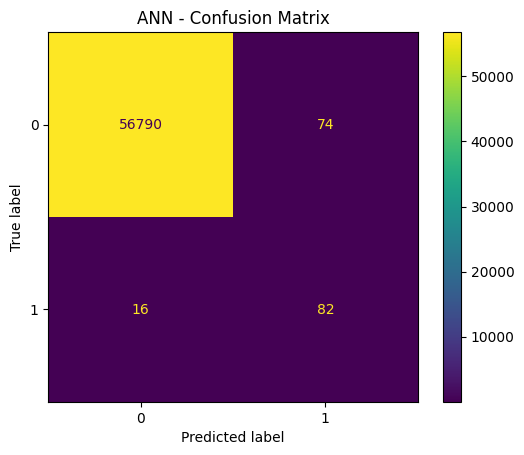

In [23]:

print("=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred_lr))

print("\n=== XGBoost Report ===")
print(classification_report(y_test, y_pred_xgb))

print("\n=== ANN Report ===")
print(classification_report(y_test, y_pred_ann_class))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ann_class)
plt.title("ANN - Confusion Matrix")
plt.show()


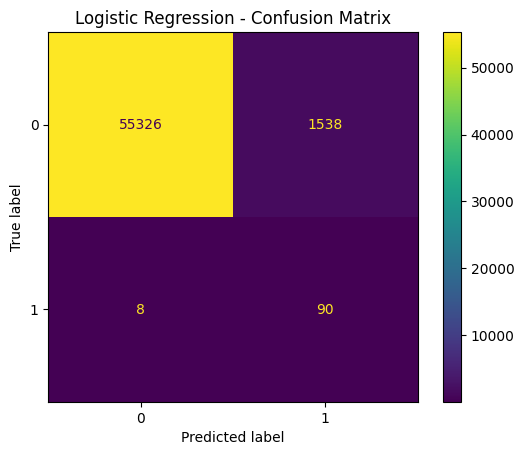

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


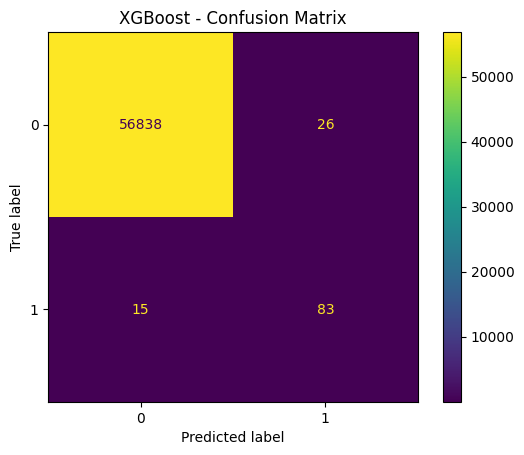

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)
plt.title("XGBoost - Confusion Matrix")
plt.show()


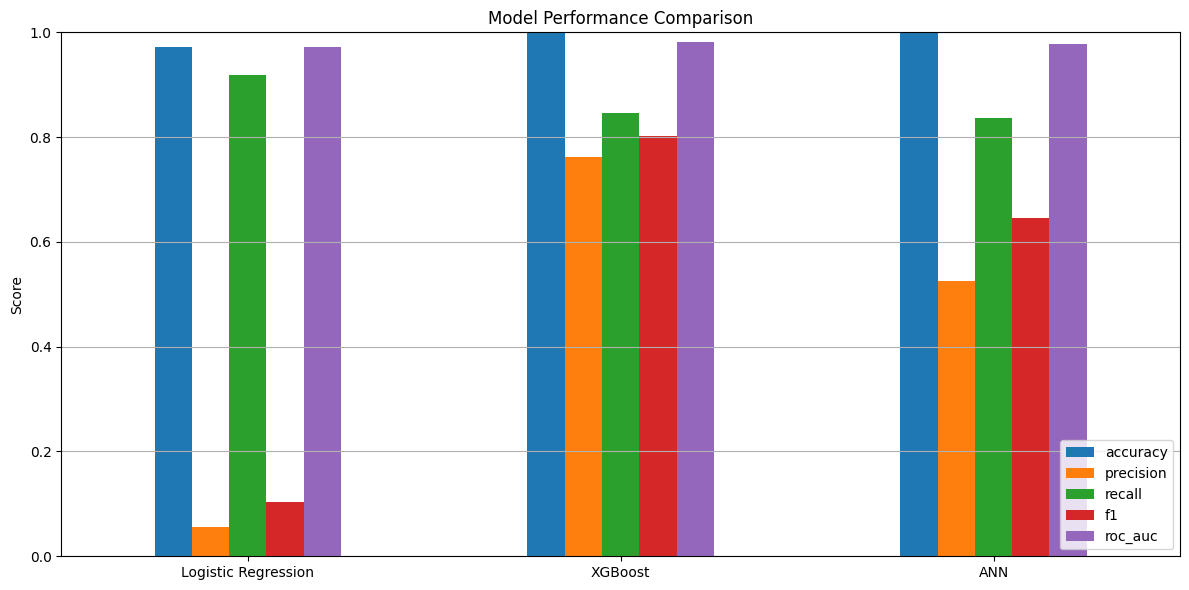

In [26]:


metrics_df = pd.DataFrame(results).T  # .T transposes so models are rows

# Plot F1, Recall, Accuracy side-by-side
metrics_df[['accuracy', 'precision', 'recall', 'f1', 'roc_auc']].plot(kind='bar', figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [27]:
print(df1.columns)


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Amount_scaled', 'Hour'],
      dtype='object')


In [28]:
# Fit the logistic regression model before using it for prediction
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [29]:
real_time_input = {
    'V1': -1.359807,
    'V2': -0.072781,
    'V3': 2.536346,
    'V4': 1.378155,
    'V5': -0.338321,
    'V6': 0.462388,
    'V7': 0.239599,
    'V8': 0.098698,
    'V9': 0.363787,
    'V10': 0.090794,
    'V11': -0.551600,
    'V12': -0.617801,
    'V13': -0.991390,
    'V14': -0.311169,
    'V15': 1.468177,
    'V16': -0.470401,
    'V17': 0.207971,
    'V18': 0.025791,
    'V19': 0.403993,
    'V20': 0.251412,
    'V21': -0.018307,
    'V22': 0.277838,
    'V23': -0.110474,
    'V24': 0.066928,
    'V25': 0.128539,
    'V26': -0.189115,
    'V27': 0.133558,
    'V28': -0.021053,
    'Amount_scaled': 0.244964,
    'Hour': 13
}
real_time_df = pd.DataFrame([real_time_input])

# Predict with all models
pred_lr = lr.predict(real_time_df)[0]
pred_xgb = xgb.predict(real_time_df)[0]
pred_ann = (model.predict(real_time_df)[0][0] > 0.5).astype(int)

# Output predictions
print("Logistic Regression:", "Fraud" if pred_lr else "Legal")
print("XGBoost           :", "Fraud" if pred_xgb else "Legal")
print("ANN               :", "Fraud" if pred_ann else "Legal")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Logistic Regression: Fraud
XGBoost           : Legal
ANN               : Legal


C:\Users\Madhumitha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [30]:
proba_lr = lr.predict_proba(real_time_df)[0][1]
print(f"Logistic Regression confidence: {proba_lr:.2f}")



Logistic Regression confidence: 0.94


C:\Users\Madhumitha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [31]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_lr = CalibratedClassifierCV(lr, method='sigmoid')
calibrated_lr.fit(X_train, y_train)


CalibratedClassifierCV(estimator=LogisticRegression(max_iter=1000))

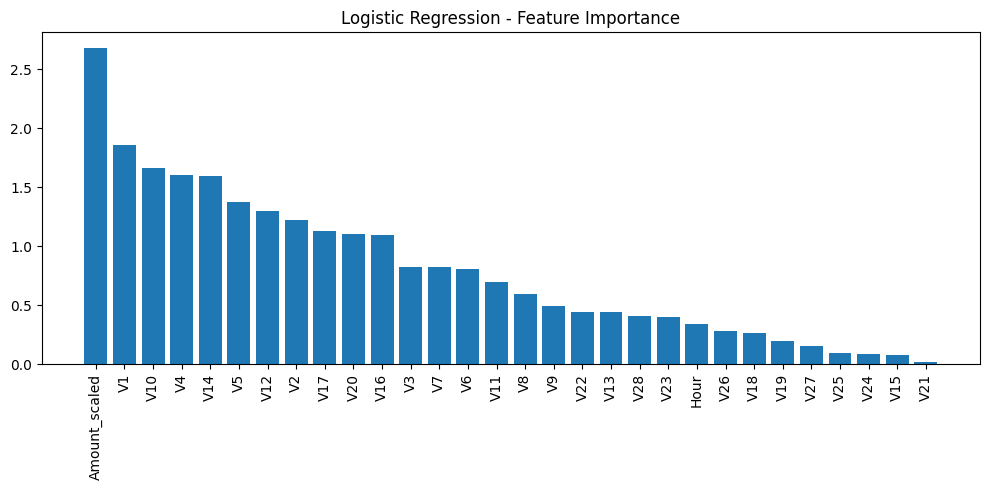

In [32]:
feature_names = df1.drop('Class', axis=1).columns  # assuming 'Class' is the label


importances = np.abs(lr.coef_[0])
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(len(sorted_idx)), importances[sorted_idx])
plt.xticks(range(len(sorted_idx)), feature_names[sorted_idx], rotation=90)
plt.title("Logistic Regression - Feature Importance")
plt.tight_layout()
plt.show()



In [33]:
print(f"Logistic Regression confidence: {lr.predict_proba(real_time_df)[0][1]:.2f}")
print(f"XGBoost confidence: {xgb.predict_proba(real_time_df)[0][1]:.2f}")
print(f"ANN confidence: {model.predict(real_time_df)[0][0]:.2f}")


Logistic Regression confidence: 0.94
XGBoost confidence: 0.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
ANN confidence: 0.00


C:\Users\Madhumitha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [34]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the ANN model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # binary classification
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

# Fit
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=30,
                    batch_size=2048,
                    callbacks=[early_stop, lr_reduce],
                    verbose=1)


Epoch 1/30
223/223 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8972 - loss: 0.3673 - val_accuracy: 0.9474 - val_loss: 0.2678 - learning_rate: 0.0010
Epoch 2/30
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9807 - loss: 0.1298 - val_accuracy: 0.9796 - val_loss: 0.1227 - learning_rate: 0.0010
Epoch 3/30
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9915 - loss: 0.0728 - val_accuracy: 0.9913 - val_loss: 0.0640 - learning_rate: 0.0010
Epoch 4/30
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9954 - loss: 0.0448 - val_accuracy: 0.9967 - val_loss: 0.0351 - learning_rate: 0.0010
Epoch 5/30
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9964 - loss: 0.0315 - val_accuracy: 0.9969 - val_loss: 0.0275 - learning_rate: 0.0010
Epoch 6/30
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9972 - loss: 0.0239 - val_accuracy: 0.9969 - val_loss: 0.0237 - learning_rate: 0.0010
Epoch 7/30
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9975 - loss: 0.0200 - 

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step  
Classification Report - ANN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.80      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



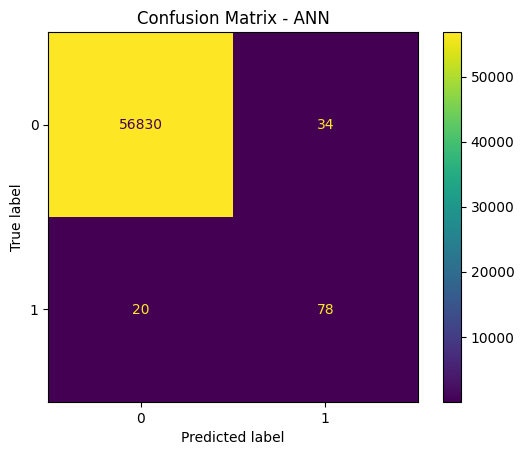

In [36]:
# Predict on test set
y_pred_ann = (model.predict(X_test_scaled) > 0.5).astype(int)

# ANN Performance
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report - ANN")
print(classification_report(y_test, y_pred_ann))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ann)
plt.title("Confusion Matrix - ANN")
plt.show()


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 924us/step


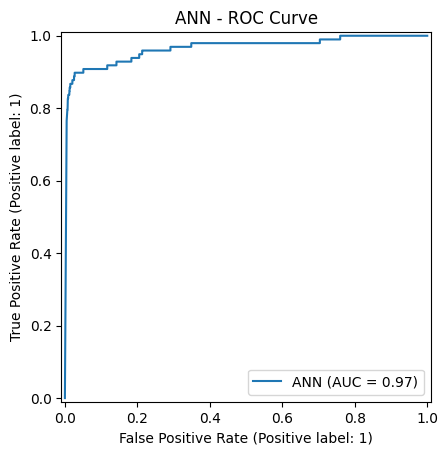

In [37]:

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, model.predict(X_test), name="ANN")
plt.title("ANN - ROC Curve")
plt.show()



In [38]:
from sklearn.metrics import classification_report

# Predict class from ANN output
y_pred_ann_class = (model.predict(X_test) > 0.5).astype(int)

print("Classification Report for ANN:")
print(classification_report(y_test, y_pred_ann_class))


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 857us/step
Classification Report for ANN:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     56864
           1       0.02      0.91      0.04        98

    accuracy                           0.93     56962
   macro avg       0.51      0.92      0.50     56962
weighted avg       1.00      0.93      0.96     56962



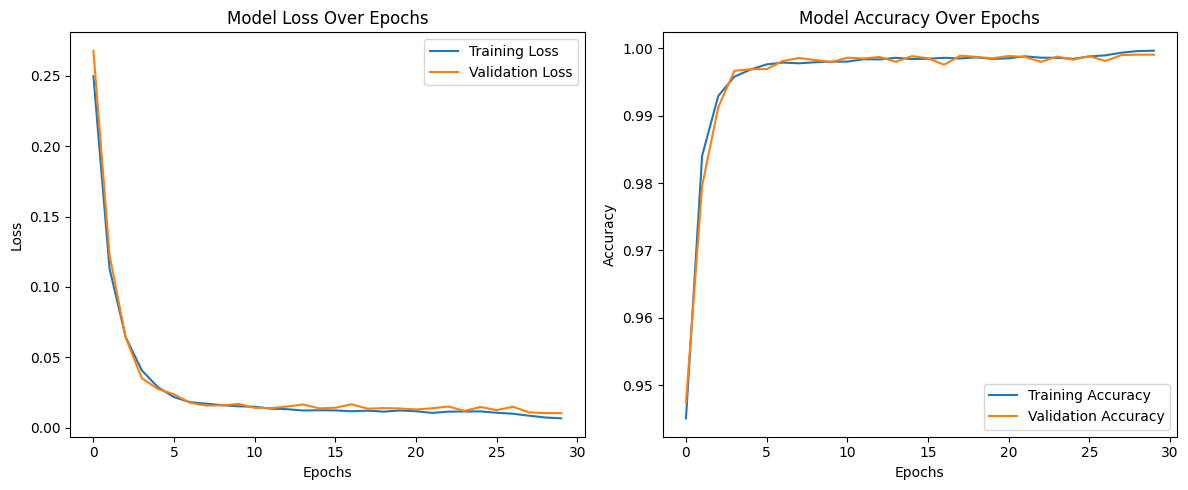

In [39]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
